## Q1. What are the key features of the wine quality dataset? Discuss the importance of each feature in predicting the quality of wine.

Answer:
The wine quality dataset consists of 12 attributes, including:

Fixed Acidity: Influences taste and structure.

Volatile Acidity: High levels can cause an unpleasant, vinegary taste.

Citric Acid: Adds freshness and enhances flavor.

Residual Sugar: Determines sweetness of the wine.

Chlorides: Salt level in wine, affecting taste.

Free Sulfur Dioxide: Prevents spoilage and oxidation.

Total Sulfur Dioxide: Excess can lead to a strong sulfur taste.

Density: Can affect the perceived sweetness.

pH: Acidity level that affects taste.

Sulphates: Preservative, adds to stability.

Alcohol: Directly impacts flavor and body.

Quality (target variable): A score between 0 and 10.

## Q2. How did you handle missing data in the wine quality dataset during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

Answer:
The wine quality dataset may not have missing values by default. If missing data existed, I would handle it through imputation techniques:

Mean/Median Imputation:

Advantages: Simple and fast.

Disadvantages: Can distort the distribution of the data, especially in skewed datasets.

K-Nearest Neighbors (KNN) Imputation:

Advantages: Captures relationships between variables.

Disadvantages: Computationally expensive.

Multivariate Imputation by Chained Equations (MICE):

Advantages: Accounts for uncertainty in missing data.

Disadvantages: More complex and computationally demanding.

## Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

Answer:
Key factors affecting student performance may include:

Study Time

Parental Support

Previous Academic Records

Family Background

Health and Sleep Patterns

School Infrastructure

To analyze these factors, I would:

Exploratory Data Analysis (EDA) to understand feature distributions and correlations.

Correlation Analysis (Pearson or Spearman) to assess relationships between features and performance.

Multiple Linear Regression to quantify the impact of each factor on exam performance.

ANOVA or Chi-square tests to examine categorical variables like parental support.

## Q4. Describe the process of feature engineering in the context of the student performance dataset. How did you select and transform the variables for your model?

Answer:
Feature engineering steps in the student performance dataset:

Handling Categorical Variables:

Used Label Encoding or One-Hot Encoding for variables like gender, parental education, etc.

Transformation of Features:

Standardization for numerical features like study hours, to ensure all features are on the same scale.

Feature Interaction: Created interaction terms between study time and other features to capture non-linear relationships.

Feature Selection:

Used Correlation Matrix and Feature Importance from models like Random Forest to select the most relevant features.



## Q5. Load the wine quality dataset and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

Dataset Loaded Successfully:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

First 5 Rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \

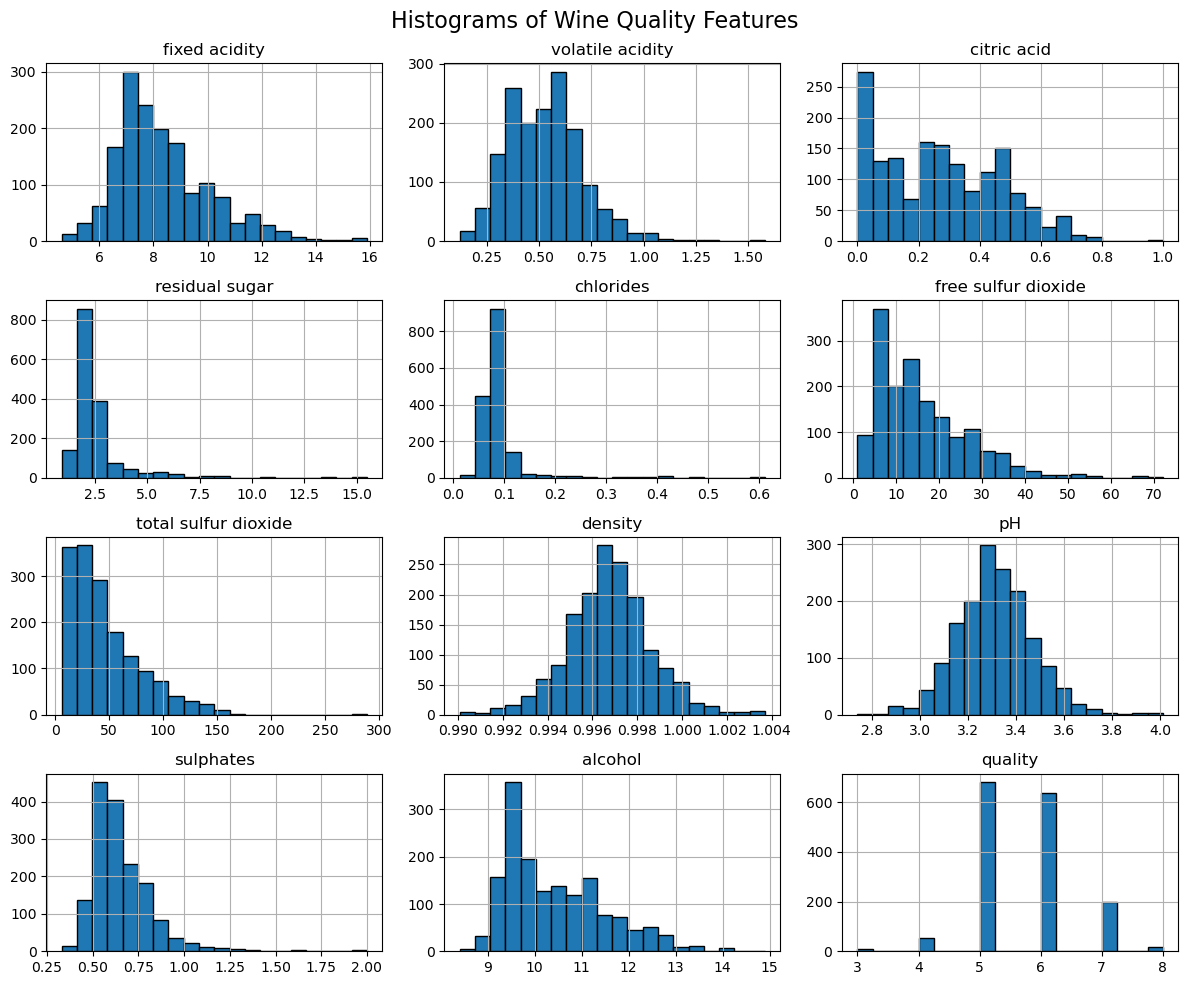

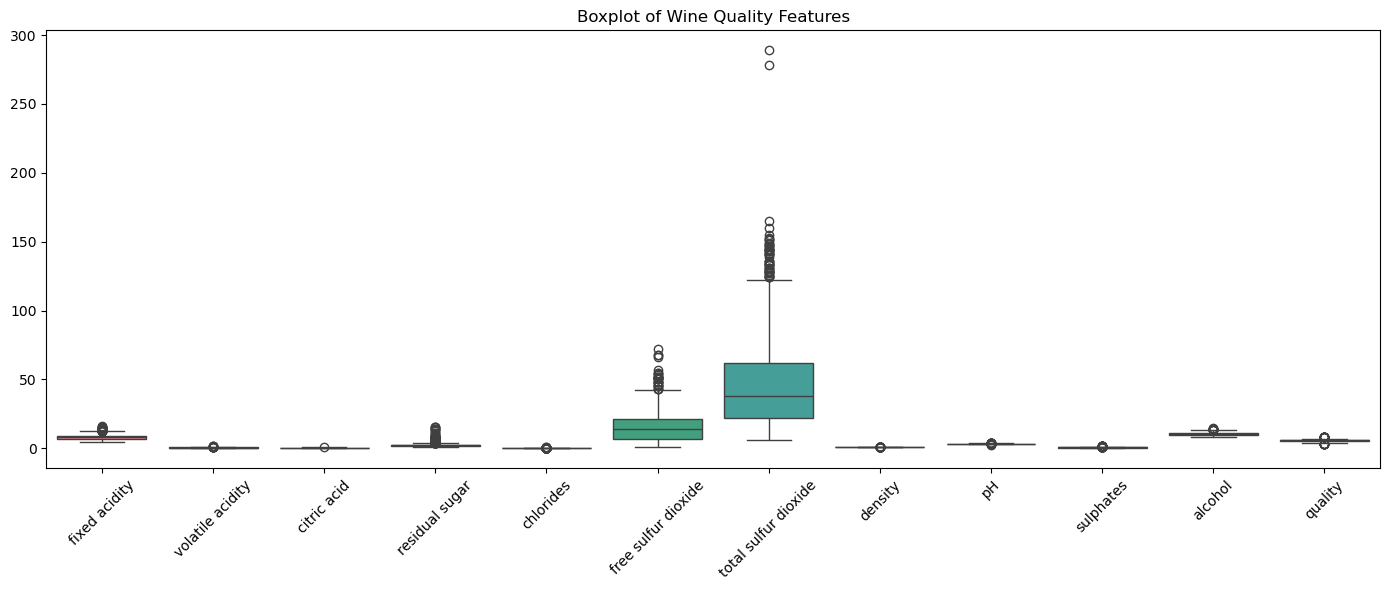

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=';')  # the separator in the file is a semicolon

# Basic information
print("Dataset Loaded Successfully:")
print(wine_data.info())
print("\nFirst 5 Rows:")
print(wine_data.head())

# Exploratory Data Analysis (EDA)
wine_data.hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.suptitle("Histograms of Wine Quality Features", fontsize=16)
plt.tight_layout()
plt.show()

# Boxplot to check non-normality / outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=wine_data)
plt.xticks(rotation=45)
plt.title("Boxplot of Wine Quality Features")
plt.tight_layout()
plt.show()


## Q6. Using the wine quality dataset, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize the data
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_data.drop('quality', axis=1))

# Apply PCA
pca = PCA(n_components=11)
pca.fit(wine_scaled)

# Cumulative variance explained by principal components
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("Variance explained by each component:", explained_variance)

# Number of components required for 90% variance
import numpy as np
components_needed = np.argmax(explained_variance >= 0.90) + 1
print("Number of components to explain 90% variance:", components_needed)


Variance explained by each component: [0.28173931 0.45682201 0.59778051 0.70807438 0.79528275 0.85524714
 0.90831906 0.94676967 0.97810077 0.99458561 1.        ]
Number of components to explain 90% variance: 7
